# Importing Necessary Libraries

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import random as rd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
import skimage.io
from skimage.transform import resize

# Reading Pictures from Folder and storing Image Data, Flattened Data and Target in lists

In [8]:
datadir="/content/"
food_list=["Burger","Pizza Slice"]
target=[]
flat_data=[]
image_data=[]

for i in food_list:
    path = os.path.join(datadir,i)
    for img in os.listdir(path):
        img_data = skimage.io.imread(os.path.join(path,img),as_gray=True)
        img_resized_data = resize(img_data,(150,150)) 
        image_data.append(img_resized_data)
        flat_data.append(np.ndarray.flatten(img_resized_data))
        target.append(i)

# Displaying One Random Photo

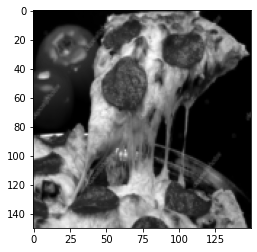

In [9]:
plt.imshow(image_data[rd.randint(0,100)],cmap=plt.cm.gray)
plt.show()

# Checking variables for training and changing to Numpy Arrray for faster calculation

In [10]:
print(len(flat_data),"\n",flat_data)

100 
 [array([0.96881657, 0.96426997, 0.871763  , ..., 0.57361284, 0.60192447,
       0.71449144]), array([0.55687353, 0.55706276, 0.56113421, ..., 0.8634483 , 0.86470796,
       0.867721  ]), array([1., 1., 1., ..., 1., 1., 1.]), array([0.01595412, 0.01595412, 0.01595412, ..., 0.06079967, 0.06079007,
       0.06079007]), array([0.21713705, 0.21900577, 0.21485407, ..., 0.2381709 , 0.23816738,
       0.23816715]), array([0.2541429 , 0.26333858, 0.27245771, ..., 0.19815295, 0.20903744,
       0.20603496]), array([1., 1., 1., ..., 1., 1., 1.]), array([0.09003739, 0.087582  , 0.08738194, ..., 0.65186975, 0.66032003,
       0.67224449]), array([0.08084512, 0.07914245, 0.08070697, ..., 0.08492843, 0.08765777,
       0.08689309]), array([0.97227019, 0.97014892, 0.97039837, ..., 0.27246685, 0.26625657,
       0.26109922]), array([0.02379725, 0.02379701, 0.02339011, ..., 0.08532849, 0.07207193,
       0.07037247]), array([0.07184014, 0.07184014, 0.07184014, ..., 0.15442535, 0.1541333 ,
       0

In [11]:
print(len(target),"\n",target)

100 
 ['Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice', 'Pizza Slice'

In [12]:
flat_data = np.array(flat_data)
target = np.array(target)

In [13]:
print(type(flat_data),type(target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


# Encoding Target Data Values 

In [14]:
encoded_target=[]
ec=0
for i in range(0,len(target)-1):
    if(target[i]==target[i+1]):
        encoded_target.append(ec)
        continue
    else:
        encoded_target.append(ec)
        ec+=1
encoded_target.append(ec)

In [15]:
print(len(target),len(encoded_target),sep=",")
print("\n",encoded_target)

100,100

 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


# Displaying all data for Model Training in a Dataframe

In [16]:
Model_Data=pd.DataFrame(flat_data)
Model_Data["Food"]=encoded_target
Model_Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22461,22462,22463,22464,22465,22466,22467,22468,22469,22470,22471,22472,22473,22474,22475,22476,22477,22478,22479,22480,22481,22482,22483,22484,22485,22486,22487,22488,22489,22490,22491,22492,22493,22494,22495,22496,22497,22498,22499,Food
0,0.968817,0.964270,0.871763,0.645876,0.699915,0.887762,0.820501,0.788889,0.811671,0.874710,0.811027,0.792548,0.838913,0.814569,0.775594,0.830596,0.854423,0.791059,0.735246,0.791917,0.806416,0.794427,0.791285,0.804981,0.854606,0.874930,0.870318,0.882670,0.814249,0.802376,0.821401,0.785644,0.775777,0.831746,0.828775,0.789999,0.788744,0.817912,0.840637,0.806720,...,0.171303,0.170673,0.153934,0.150566,0.152636,0.152366,0.160436,0.158109,0.157506,0.146135,0.134379,0.150272,0.159806,0.165866,0.170464,0.167313,0.166027,0.162679,0.161769,0.157669,0.162269,0.170806,0.175747,0.187468,0.217199,0.389453,0.609173,0.678894,0.702231,0.722969,0.553784,0.548390,0.720658,0.728089,0.711919,0.638830,0.573613,0.601924,0.714491,0
1,0.556874,0.557063,0.561134,0.564268,0.562125,0.559355,0.557825,0.555943,0.552782,0.550208,0.543481,0.539708,0.532534,0.519828,0.503274,0.485908,0.476751,0.474573,0.477557,0.484931,0.483184,0.478520,0.474491,0.470451,0.462471,0.453253,0.446627,0.448166,0.455586,0.458719,0.457938,0.444846,0.429889,0.420356,0.421704,0.425715,0.434038,0.442880,0.453643,0.462254,...,0.902807,0.895517,0.889893,0.887134,0.882494,0.876653,0.873115,0.870084,0.867462,0.864723,0.862377,0.864115,0.865812,0.868823,0.869117,0.869404,0.870416,0.870093,0.870610,0.872428,0.871360,0.872292,0.874286,0.872713,0.870656,0.870886,0.870896,0.870809,0.871715,0.871180,0.869636,0.867285,0.864929,0.866857,0.867104,0.864491,0.863448,0.864708,0.867721,0
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.999999,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
3,0.015954,0.015954,0.015954,0.015954,0.015954,0.015954,0.015954,0.015954,0.015954,0.015954,0.015958,0.017325,0.020979,0.019563,0.016054,0.014903,0.012895,0.015785,0.020611,0.020686,0.020702,0.022508,0.024604,0.026606,0.028538,0.030704,0.032476,0.034138,0.036783,0.046497,0.040279,0.044975,0.044399,0.049814,0.052052,0.052059,0.052344,0.058227,0.060238,0.066355,...,0.061003,0.061003,0.061003,0.061003,0.061003,0.061001,0.060805,0.060610,0.058392,0.056892,0.059487,0.060998,0.061003,0.061086,0.063692,0.064688,0.061973,0.061006,0.061003,0.061003,0.061003,0.061003,0.061003,0.060986,0.060787,0.061085,0.064147,0.064212,0.061377,0.060657,0.058215,0.058583,0.061906,0.061959,0.061089,0.060989,0.060800,0.060790,0.060790,0
4,0.217137,0.219006,0.214854,0.216968,0.222907,0.222258,0.216238,0.219771,0.222409,0.225907,0.220956,0.223811,0.224939,0.221505,0.220420,0.219580,0.223313,0.221140,0.221809,0.221633,0.221947,0.222482,0.224105,0.228835,0.226976,0.224266,0.224170,0.221979,0.228730,0.229900,0.229710,0.233033,0.228776,0.224606,0.223398,0.220262,0.217828,0.221360,0.222715,0.219157,...,0.259016,0.258994,0.256134,0.255169,0.253932,0.253647,0.253405,0.249020,0.245263,0.243263,0.242546,0.241373,0.240347,0.242119,0.243610,0.240915,0.240086,0.239582,0.239819,0.240707,0.239631,0.239069,0.239100,0.239263,0.239634,0.238709,0.238855,0.238394,0.238365,0.238472,0.238366,0.238384,0.238239,0.238182,0.238171,0.238181,0.238171,0.238167,0.238167,0
...,...,...,...,...,...,...,...,...,...,...,...,...

# Splitting Data for Training and Testing

In [17]:
x_train,x_test,y_train,y_test=train_test_split(flat_data,encoded_target,test_size=0.25,random_state=42)

# Logistic Regression

In [18]:
lgr_param_grid={"solver":['newton-cg','liblinear'],"C":[1,3,5,7,9]}
lgr_model=LogisticRegression()
lgr_cv=GridSearchCV(lgr_model,lgr_param_grid)
lgr_cv.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 3, 5, 7, 9],
                         'solver': ['newton-cg', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [19]:
lgr_cv.best_params_

{'C': 1, 'solver': 'liblinear'}

In [20]:
lgr_predict=lgr_cv.predict(x_test)

In [21]:
lgr_accuracy=accuracy_score(y_test,lgr_predict)*100
lgr_cm=confusion_matrix(y_test,lgr_predict)
lgr_cr=classification_report(y_test,lgr_predict)

# Support Vector Machine

In [22]:
svm_model=SVC()
svm_param_grid={"kernel": ['linear', 'poly', 'rbf'],"C":[1,3,5,7,9]}
svm_cv=GridSearchCV(svm_model,svm_param_grid)
svm_cv.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 3, 5, 7, 9],
                         'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [23]:
svm_cv.best_params_

{'C': 1, 'kernel': 'poly'}

In [24]:
svm_predict=svm_cv.predict(x_test)

In [25]:
svm_accuracy=accuracy_score(y_test,svm_predict)*100
svm_cm=confusion_matrix(y_test,svm_predict)
svm_cr=classification_report(y_test,svm_predict)

# Decision Tree

In [26]:
dect=DecisionTreeClassifier()
dt_param_grid={'criterion':["gini","entropy"],'splitter':["best","random"]}
dtree=GridSearchCV(dect,dt_param_grid)
dtree.fit(x_train,y_train)
dtree_pred=dtree.predict(x_test)

In [27]:
dtree.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [28]:
dt_accuracy=accuracy_score(y_test,dtree_pred)*100
dt_cm=confusion_matrix(y_test,dtree_pred)
dt_cr=classification_report(y_test,dtree_pred)

# Random Forest

In [29]:
rfc=RandomForestClassifier()
rf_param_grid={"n_estimators": [i for i in range(1,50)],"criterion":["gini","entropy"]}
rf=GridSearchCV(rfc,rf_param_grid)
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)

In [30]:
rf.best_params_

{'criterion': 'gini', 'n_estimators': 19}

In [31]:
rf_accuracy=accuracy_score(y_test,rfpred)*100
rf_cm=confusion_matrix(y_test,rfpred)
rf_cr=classification_report(y_test,rfpred)

# K Neighbors 

In [32]:
kn=KNeighborsClassifier()
kn_param_grid={"n_neighbors" : [i for i in range(1,10)],"weights":["uniform","distance"]}
kn_model=GridSearchCV(kn,kn_param_grid)
kn_model.fit(x_train,y_train)
kn_pred=kn_model.predict(x_test)

In [33]:
kn_model.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [34]:
kn_accuracy=accuracy_score(y_test,kn_pred)*100
kn_cm=confusion_matrix(y_test,kn_pred)
kn_cr=classification_report(y_test,kn_pred)

# Displaying Scores of Various Models

In [35]:
Model_Scores=pd.DataFrame({"K Neighbours":[kn_accuracy],
                           "Logistic Regression" : [lgr_accuracy],
                           "Support Vector Machine": [svm_accuracy],
                           "Decision Tree":[dt_accuracy],
                           "Random Forest":[rf_accuracy]},index=["Accuracy Score"])

In [36]:
Model_Scores

,K Neighbours,Logistic Regression,Support Vector Machine,Decision Tree,Random Forest
Accuracy Score,80.0,76.0,84.0,80.0,76.0


# Classification Report and Confusion Matrix for Logistic Regression

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.73      0.73      0.73        11

    accuracy                           0.76        25
   macro avg       0.76      0.76      0.76        25
weighted avg       0.76      0.76      0.76        25


	LOGISTIC REGRESSION


[]

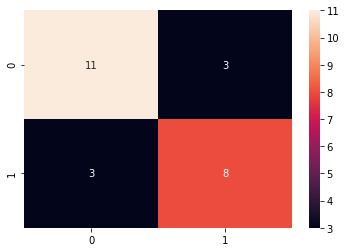

In [37]:
print(lgr_cr)
print("\n\tLOGISTIC REGRESSION")
sns.heatmap(lgr_cm,annot=True)
plt.plot()

# Classification Report and Confusion Matrix for Support Vector Machine

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.82      0.82      0.82        11

    accuracy                           0.84        25
   macro avg       0.84      0.84      0.84        25
weighted avg       0.84      0.84      0.84        25


	SUPPORT VECTOR MACHINE


[]

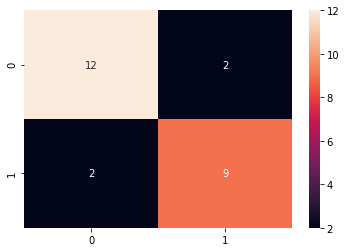

In [38]:
print(svm_cr)
print("\n\tSUPPORT VECTOR MACHINE")
sns.heatmap(svm_cm,annot=True)
plt.plot()

# Classification Report and Confusion Matrix for K Neighbours

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        14
           1       1.00      0.55      0.71        11

    accuracy                           0.80        25
   macro avg       0.87      0.77      0.78        25
weighted avg       0.85      0.80      0.79        25


	K Neighbours


[]

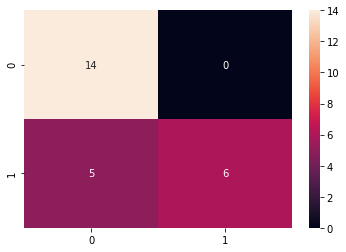

In [39]:
print(kn_cr)
print("\n\tK Neighbours")
sns.heatmap(kn_cm,annot=True)
plt.plot()

# Classification Report and Confusion Matrix for Decision Tree

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.75      0.82      0.78        11

    accuracy                           0.80        25
   macro avg       0.80      0.80      0.80        25
weighted avg       0.80      0.80      0.80        25


	Decision Tree


[]

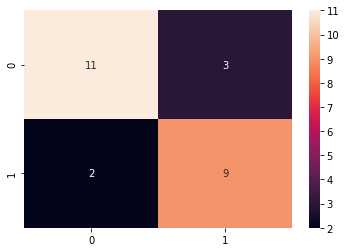

In [40]:
print(dt_cr)
print("\n\tDecision Tree")
sns.heatmap(dt_cm,annot=True)
plt.plot()

# Classification Report and Confusion Matrix for Random Forest

              precision    recall  f1-score   support

           0       0.72      0.93      0.81        14
           1       0.86      0.55      0.67        11

    accuracy                           0.76        25
   macro avg       0.79      0.74      0.74        25
weighted avg       0.78      0.76      0.75        25


	Random Forest


[]

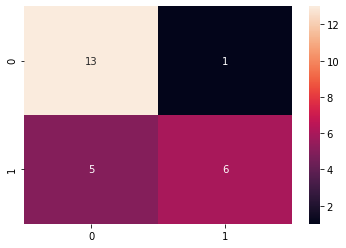

In [41]:
print(rf_cr)
print("\n\tRandom Forest")
sns.heatmap(rf_cm,annot=True)
plt.plot()

# Testing with New Image


	[0] - Burger [1]- Pizza Slice

Logistic Regression Model Output    :  [0]
Support Vector Machine Model Output :  [0]
Decision Tree Model Output          :  [0]
Random Forest Model Output          :  [0]
K Neighbors Model Output            :  [0]


[]

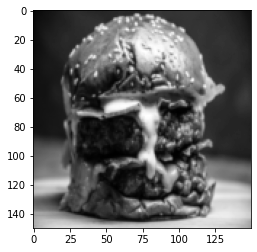

In [42]:
new_data=[]
url="https://twisper.com/wp-content/uploads/2020/03/close-up-photo-of-burger-3915906-scaled.jpg"
#url=input("image url: ") #uncomment this to test with any image url
img=skimage.io.imread(url,as_gray=True)
img=resize(img,(150,150))
new_data.append(np.ndarray.flatten(img))
print("\n\t[0] - Burger [1]- Pizza Slice\n")
print("Logistic Regression Model Output    : ",lgr_cv.predict([new_data[0]]))
print("Support Vector Machine Model Output : ",svm_cv.predict([new_data[0]]))
print("Decision Tree Model Output          : ",dtree.predict([new_data[0]]))
print("Random Forest Model Output          : ",rf.predict([new_data[0]]))
print("K Neighbors Model Output            : ",kn_model.predict([new_data[0]]))

plt.imshow(img,cmap="gray")
plt.plot()


	[0] - Burger [1]- Pizza Slice

Logistic Regression Model Output    :  [1]
Support Vector Machine Model Output :  [1]
Decision Tree Model Output          :  [1]
Random Forest Model Output          :  [1]
K Neighbors Model Output            :  [1]


[]

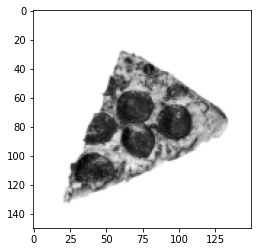

In [43]:
new_data=[]
url="https://media.istockphoto.com/photos/slice-of-fresh-italian-classic-original-pepperoni-pizza-isolated-picture-id496546118?k=6&m=496546118&s=612x612&w=0&h=lQqZS7Wce2bVCkgctEvBPBR5tlUxHGq2HjgpC7iOt3s="
#url=input("image url: ") #uncomment this to test with any image url
img=skimage.io.imread(url,as_gray=True)
img=resize(img,(150,150))
new_data.append(np.ndarray.flatten(img))
print("\n\t[0] - Burger [1]- Pizza Slice\n")
print("Logistic Regression Model Output    : ",lgr_cv.predict([new_data[0]]))
print("Support Vector Machine Model Output : ",svm_cv.predict([new_data[0]]))
print("Decision Tree Model Output          : ",dtree.predict([new_data[0]]))
print("Random Forest Model Output          : ",rf.predict([new_data[0]]))
print("K Neighbors Model Output            : ",kn_model.predict([new_data[0]]))

plt.imshow(img,cmap="gray")
plt.plot()